In [3]:
import pandas as pd 
import numpy as np 
from PIL import Image
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

In [4]:
full_df = pd.read_csv("data/full_df.csv")

In [5]:
full_df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [7]:
df = full_df.drop_duplicates(subset='ID', keep='first').sort_values(by="ID")


In [20]:
df.shape

(3358, 19)

In [21]:
df = df[df[['N', 'D', 'G', "C",'A', 'H', 'M', 'O']].sum(axis=1)==1]

In [22]:
df.shape

(2802, 19)

In [23]:
df[df['ID'] == 4690]

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
3192,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_right.jpg


In [ ]:
#mash original eye files together to make a 1024 x 512 image 


In [24]:
#turn 1024 x 512 x 3 -> 1024 x 512 x 1 with black and white gray scale 
img_path = "data/eyeball_img/4690_eyes.jpg"
img = Image.open(img_path).convert('RGB')
width, height = img.size
print(width, height)

1024 512


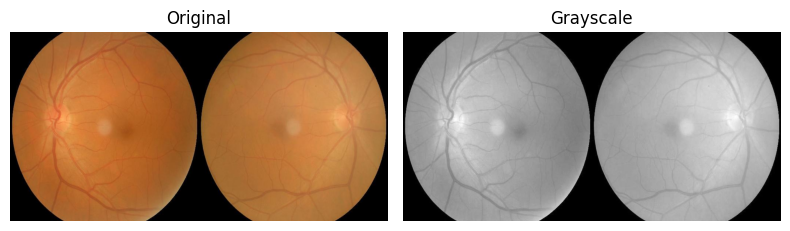

In [25]:

img_array = np.asarray(img)
grayscale = rgb2gray(img_array)
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(img)
ax[0].set_title("Original")
ax[0].axis('off')

ax[1].imshow(grayscale, cmap='gray')
ax[1].set_title("Grayscale")
ax[1].axis('off')

fig.tight_layout()
plt.show()

In [ ]:
# X -> PCA -> SVM/kNN

In [26]:
df = df[['ID', 'N', 'D', 'G','C', 'A', 'H', 'M', 'O', 'labels', 'target']]
df['image'] = df['ID'].astype(str) + '_eyes.jpg'

In [27]:
df.head()

,ID,N,D,G,C,A,H,M,O,labels,target,image
0,0,0,0,0,1,0,0,0,0,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_eyes.jpg
1,1,1,0,0,0,0,0,0,0,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_eyes.jpg
3196,3,0,0,0,0,0,0,0,1,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",3_eyes.jpg
4,5,0,1,0,0,0,0,0,0,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_eyes.jpg
7,8,1,0,0,0,0,0,0,0,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",8_eyes.jpg


Data has two conflicting markers. 

For example, in the table above ID 0 has a 1 in the column for cataract but the label for normal. 

We make a second target column labeled target2 based on the N-O columns. 

Dictionary reference: 

[N = 0, D = 1, G = 2, C = 3, A = 4, H = 5, M = 6, O = 7]


In [30]:
df['target2'] = df[['N', 'D', 'G','C', 'A', 'H','M', 'O']].values.tolist()

In [31]:
df.head()

,ID,N,D,G,C,A,H,M,O,labels,target,image,target2
0,0,0,0,0,1,0,0,0,0,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_eyes.jpg,"[0, 0, 0, 1, 0, 0, 0, 0]"
1,1,1,0,0,0,0,0,0,0,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_eyes.jpg,"[1, 0, 0, 0, 0, 0, 0, 0]"
3196,3,0,0,0,0,0,0,0,1,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",3_eyes.jpg,"[0, 0, 0, 0, 0, 0, 0, 1]"
4,5,0,1,0,0,0,0,0,0,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_eyes.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]"
7,8,1,0,0,0,0,0,0,0,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",8_eyes.jpg,"[1, 0, 0, 0, 0, 0, 0, 0]"


# PCA

In [ ]:
image_files = df['image']

In [35]:
for i, file in enumerate(image_files):
    img = Image.open("data/eyeball_img/" + file).convert('RGB')
    img_array = np.asarray(img, dtype=np.float32) / 255.0
    images_array[i, :] = img_array.flatten()

FileNotFoundError: [Errno 2] No such file or directory: '/home/accts/ltp8/Desktop/spring-2025/Eyeball232Project/data/eyeball_img/3_eyes.jpg'

# Neural Network 

In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, ReLU

2025-04-25 09:50:18.316753: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-25 09:50:29.724406: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745589030.978297  865894 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745589032.042238  865894 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-25 09:50:45.099893: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [ ]:
class NeuralNetwork: 
    def __init__(self, M, N):  
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(64),
            ReLU(),
            tf.keras.layers.Dense(10)
        ])

# Autoencoder 